In [1]:
import matplotlib.pyplot as plt
bigfontsize=10
labelfontsize=8
tickfontsize=8
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })


# Функция правдоподобия

Функция вероятности и функция плотности вероятности позволяют задать вероятности значений случайной величины с помощью несколькольких параметров. Эти функции позволяют определить вероятность того, что случайная величниа примет определенное значение - при условии что случайная величина распределена в соответствии с выбраной функцией. 

Это знание может быть полезно, например, при проверке гипотез - мы точно знаем свойства случайной величины (статистики) и по ее значению на выборке мы можем сделать вывод насколько вероятна гипотеза. Подробнее о проверке гипотез мы поговорим в одной из следующих лекций. Другой пример - оценка вероятностей в азартных играх. Зная правила игры, можно оценить вероятность выигрыша комбинации карт в руке. Ключевым фактором тут, снова, является уверенность в функции вероятности - оценки сделаные для честной игры будут неверны при игре с шулерами.
    
На практике, однако, функция (плотности) вероятности зачастую неизвестна. Возвращаясь к примеру из начала курса, представьте что мы хотим определить вероятность обнаружить три машины на светофоре перекрестка. Мы знаем, что количество машин на светофоре $k$ скорее всего можно будет хорошо описать распределением Пуассона:

$$ PMF(k = 3) = e^{-\mu}\frac{\mu^3}{3!}$$

Видно, что наша оценка зависит от значения параметра $\mu$ - от того, сколько машин в среднем мы ожидаем увиеть на перекрестке. 
Давайте рассмотрим эту завивисмость подробнее.

Text(0, 0.5, 'Вероятность обнаружить 3 машины')

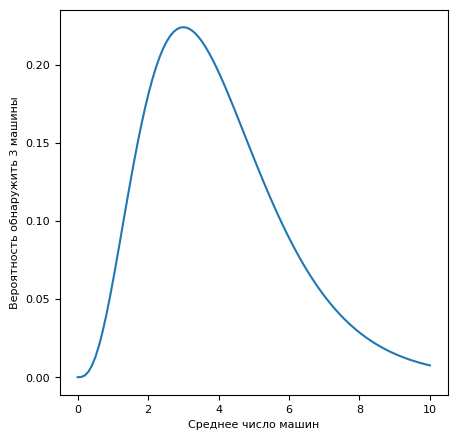

In [2]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = [poisson(_x).pmf(3) for _x in x]

f = plt.figure(figsize = (5, 5))
plt.plot(x, y)
plt.xlabel("Среднее число машин")
plt.ylabel("Вероятность обнаружить 3 машины")



Эта функция описывает вероятность обнаружения данных (3 машины) в зависимости от значения параметра (среднее) выбраной модели (распределние Пуассона). Если наблюдение уже состоялось, то эта функция может помочь оценить __правдоподобие__ модели - насколько выбранная модель правдоподобна в свете полученных данных. 

Так, максимум функции находится при $\mu = 3$ - это самая правдоподобная оценка среднего количества машин при условии единственного наблюдения трех машин. Функция стремится к нулю при удалении среднего от трех - в самом деле, сложно поверить что в среднем на перекрестке останавливается 1000 машин за раз, если прямо сейчас мы видим что сейчас их всего 3.

Представим что мы продолжили наши наблюдения и на следующем сигнале на светофоре не остановилось ни одной машины. Таким образом, наш набор данных выглядит как [3, 0]. В свете новых данных меньшие значения среднего становятся более правдоподобны. Вероятность обнаружить такой набор данных будет равно произведению вероятностей индивидуальных наблюдений:


$$P(3, 0)=PMF(3)\times PMF(0)$$

Посмотрим как будет меняться эта совместная вероятность в зависимости от значений параметра выбраной модели.



Text(0, 0.5, 'Вероятность обнаружить 3 машины и 0 машин')

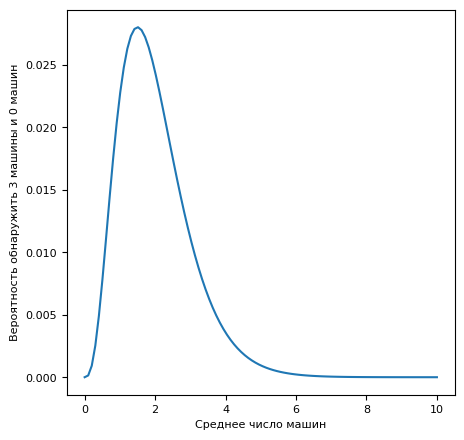

In [3]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = [poisson(_x).pmf(3)*poisson(_x).pmf(0) for _x in x]

f = plt.figure(figsize = (5, 5))
plt.plot(x, y)
plt.xlabel("Среднее число машин")
plt.ylabel("Вероятность обнаружить 3 машины и 0 машин")



В самом деле, максимум функции сместился на $\mu=1.5$ - наиболее вероятное среднее при наблюдении 3 и 0 машин.

Функция выше является __функцией правдоподобия__ (likelihood). Функция правдоподобия - это совместная вероятность выборки для выбраной модели рассматрваемая как функция параметров модели. Функция правдоподобия обозначается функцией $\mathcal{L}$:

$$\mathcal{L}(\theta|X)=\prod_{i=1...N} P(x_i|\theta)$$

В этой формуле $\theta$ обозначает параметры модели $P$, а выборка $X$ состоит из наблюдений $(x_1,...,x_N)$. 

### Значения функции правдоподобия

Рассмотрим функции равдоподобия из примера выше на одном рисунке.

Text(0, 0.5, 'Функция правдоподобия')

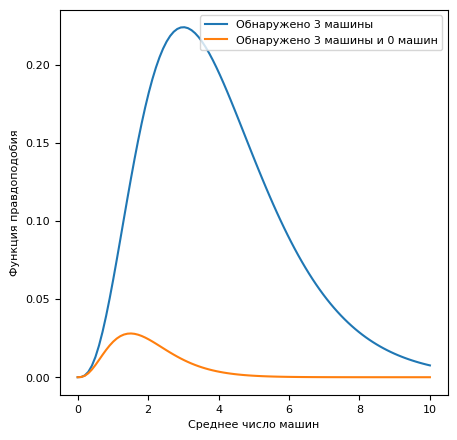

In [4]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y_1 = [poisson(_x).pmf(3) for _x in x]
y_2 = [poisson(_x).pmf(3)*poisson(_x).pmf(0) for _x in x]

f = plt.figure(figsize = (5, 5))
plt.plot(x, y_1, label = "Обнаружено 3 машины")
plt.plot(x, y_2, label = "Обнаружено 3 машины и 0 машин")
plt.legend()
plt.xlabel("Среднее число машин")
plt.ylabel("Функция правдоподобия")



С увеличением выборки значения функции правдоподобия падают. Это неслучайно - каждое следующее измеренее добавляет множитель к функции правдоподобия. Этот множитель - вероятность нового наблюдения и он не может быть больше 1.

Значит ли это что с ростом наблюдений все гипотезы становятся менее вероятны? Конечно нет. Сравнивать значения функции правдоподобия можно _только для фиксированой выборки_. Значения функции правдоподобия полученные на разных выборках сравнивать бессмыссленно. 

Рассмотрим как меняются функции правдоподобия с ростом выборки. Пусть:

- Выборка создана из случайной величины распределенной нормально $\mathcal{N}(2, 1)$
- Для описаня данных мы используем нормальное распределение $\mathcal{N}(\mu,1)$
- Мы рассматриваем функцию правдоподобия от параметра $\mu$

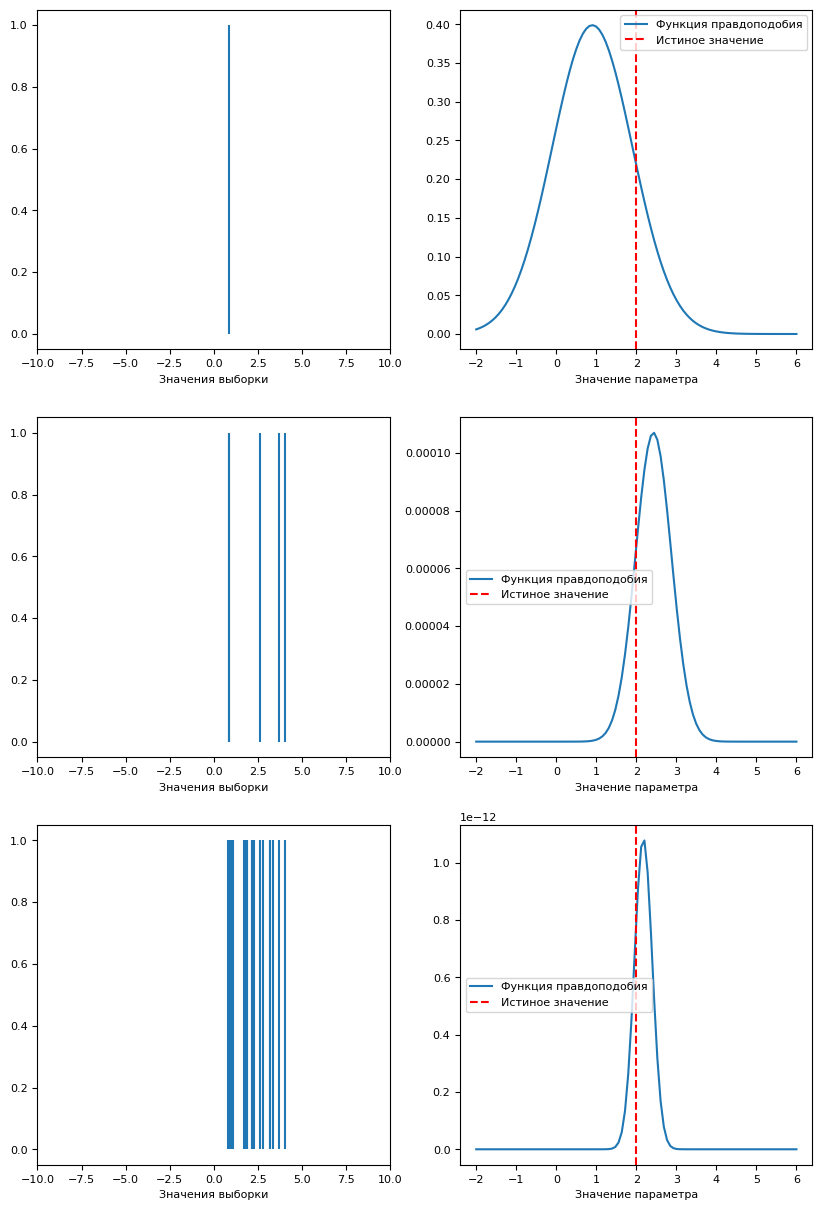

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

t_true = 2
model = norm
x = model(t_true).rvs(size = 20)
_x = np.linspace(-2, 6, 100)
likelihood_1 = np.array([model(i).pdf(x[0]) for i in _x])

likelihood_5 = []
for i in _x:
    likelihoood = 1
    for j in x[:-15]:
        likelihoood*=model(i).pdf(j) 
    likelihood_5.append(likelihoood)  


likelihood_20 = []
for i in _x:
    likelihoood = 1
    for j in x:
        likelihoood*=model(i).pdf(j) 
    likelihood_20.append(likelihoood)

f, ax = plt.subplots(3, 2, figsize = (10, 15))

ax[0,0].vlines(x[0], 0, 1)
ax[0,0].set_xlim(-10, 10)
ax[0,0].set_xlabel("Значения выборки")
ax[0,1].plot(_x, likelihood_1, label = "Функция правдоподобия")
ax[0,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение')
ax[0,1].set_xlabel("Значение параметра")
ax[0,1].legend()
ax[1,0].vlines(x[:-15], 0, 1)
ax[1,0].set_xlim(-10, 10)
ax[1,0].set_xlabel("Значения выборки")
ax[1,1].plot(_x, likelihood_5, label = "Функция правдоподобия")
ax[1,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение')
ax[1,1].set_xlabel("Значение параметра")
ax[1,1].legend()
ax[2,0].vlines(x, 0, 1)
ax[2,0].set_xlim(-10, 10)
ax[2,0].set_xlabel("Значения выборки")
ax[2,1].plot(_x, likelihood_20, label = "Функция правдоподобия")
ax[2,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение')
ax[2,1].set_xlabel("Значение параметра")
ax[2,1].legend()

Функция правдоподобия ведет себя как мы и могли бы ожидать:
- С ростом выборки максимум сходится к истиному значению, и функция правдоподобия сужается - далекие от истины оценки становятся все менее правдоподобны
- Функция правдоподобия имеет форму колокола
- Абсолютное значение быстро уменьшается с ростом выборки

Рассмотрим другой пример. В этот раз моделью будет распределение Стьюдента, а параметром - число степеней свободы.
Как и в предыдущем примере, истиная и выбраная модели совпадают. 

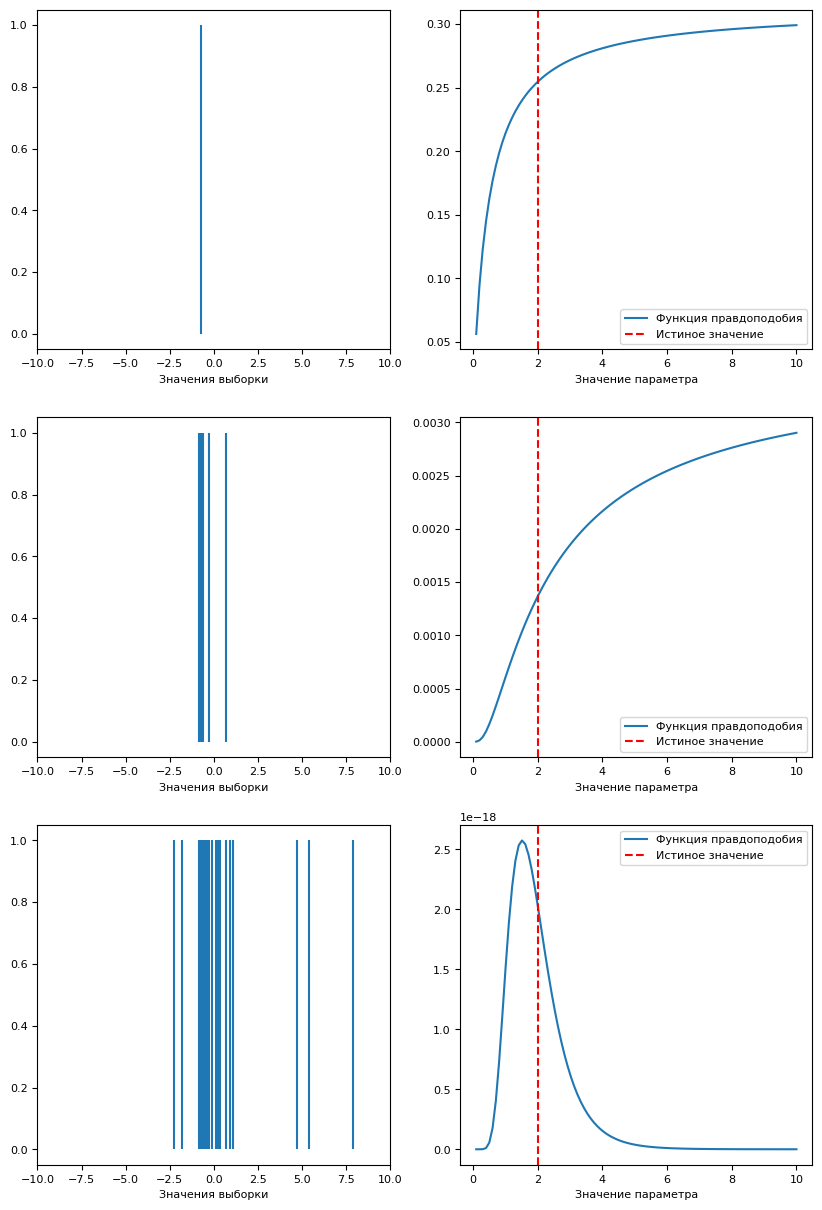

In [6]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

t_true = 2
model = t 
x = model(t_true).rvs(size = 20)
_x = np.linspace(0, 10, 100)
likelihood_1 = np.array([model(i).pdf(x[0]) for i in _x])

likelihood_5 = []
for i in _x:
    likelihoood = 1
    for j in x[:-15]:
        likelihoood*=model(i).pdf(j) 
    likelihood_5.append(likelihoood)  


likelihood_20 = []
for i in _x:
    likelihoood = 1
    for j in x:
        likelihoood*=model(i).pdf(j) 
    likelihood_20.append(likelihoood)

f, ax = plt.subplots(3, 2, figsize = (10, 15))

ax[0,0].vlines(x[0], 0, 1)
ax[0,0].set_xlim(-10, 10)
ax[0,0].set_xlabel("Значения выборки")
ax[0,1].plot(_x, likelihood_1, label = "Функция правдоподобия")
ax[0,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение')
ax[0,1].set_xlabel("Значение параметра")
ax[0,1].legend()
ax[1,0].vlines(x[:-15], 0, 1)
ax[1,0].set_xlim(-10, 10)
ax[1,0].set_xlabel("Значения выборки")
ax[1,1].plot(_x, likelihood_5, label = "Функция правдоподобия")
ax[1,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение')
ax[1,1].set_xlabel("Значение параметра")
ax[1,1].legend()
ax[2,0].vlines(x, 0, 1)
ax[2,0].set_xlim(-10, 10)
ax[2,0].set_xlabel("Значения выборки")
ax[2,1].plot(_x, likelihood_20, label = "Функция правдоподобия")
ax[2,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение')
ax[2,1].set_xlabel("Значение параметра")
ax[2,1].legend()

Интересно, что в этот раз оценка максимума сходится к истиному значению намного медленнее, а при малом объеме выбоки форма функции правдоподобия совсем далека от "колокола".

### Логарифм функции правдопдобия

Видно, что значения функции правдоподобия очень быстро уменьшаются с ростом выборки. Так, при 20 измерениях в последнем примере значение максимума было порядка $10^{-21}$. Для упрощения компьютерных операций с функцией правдоподобия на практике используется ее логарифм. Будучи монотонной функцией, такое преобразование не меняет максимума, но имеет два важных плюса:

- Значения логарфима функции правдоподобия можно хранить даже как `integer`
- Для вычисления логарифма функци правдоподобия теперь можно использовать сумму а не произведение:

$$\log\mathcal{L} = \log\prod_i P(x_i) = \sum\log P(x_i)$$

Кроме того, из-за того что некоторые алгоритмы оптимизации направлены на поиск максимума, зачастую используется отрцательный логарифм функции правдоподобия (negative log-likelihood, NLL). Сравните как выгллядит функция правдоподобия и ее отрицательный логарифм.

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/3751378674.py:18: SyntaxWarning: invalid escape sequence '\m'
  ax[1].plot(_x, likelihood, label = "Функция правдоподобия для $\mu$")
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/3751378674.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel("Значение параметра $\mu$")
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/3751378674.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax[2].plot(_x, -np.log(likelihood), label = "Функция правдоподобия для $\mu$")
/var/folder

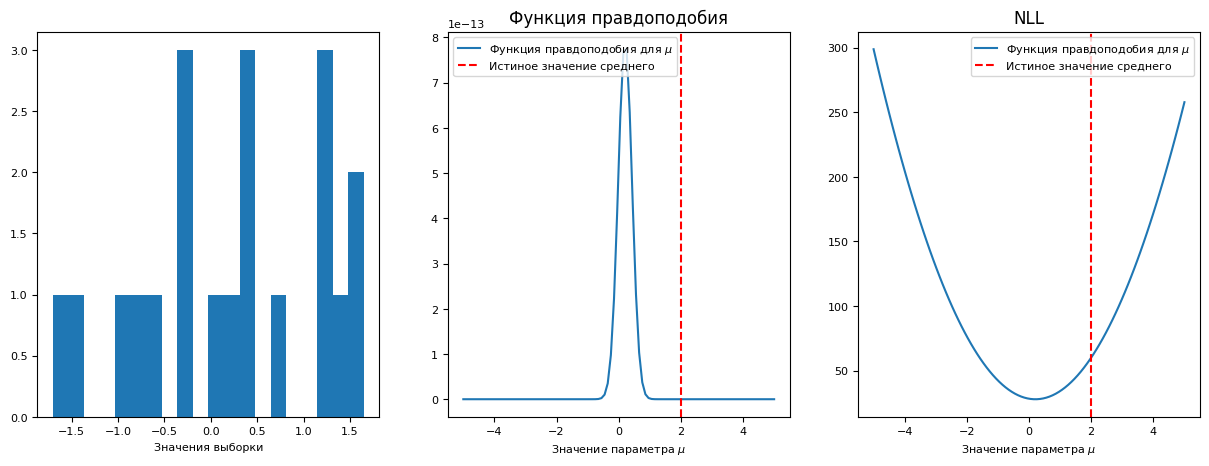

In [7]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

model = norm
x = model().rvs(size = 20)
_x = np.linspace(-5, 5, 100)
likelihood = []
for i in _x:
    _likelihoood = 1
    for j in x:
        _likelihoood*=model(i).pdf(j) 
    likelihood.append(_likelihoood)

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].hist(x, bins = 20)
ax[0].set_xlabel("Значения выборки")
ax[1].plot(_x, likelihood, label = "Функция правдоподобия для $\mu$")
ax[1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение среднего')
ax[1].set_xlabel("Значение параметра $\mu$")
ax[1].set_title("Функция правдоподобия")
ax[1].legend()
ax[2].plot(_x, -np.log(likelihood), label = "Функция правдоподобия для $\mu$")
ax[2].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение среднего')
ax[2].set_xlabel("Значение параметра $\mu$")
ax[2].set_title("NLL")
ax[2].legend()


### Роль модели в функции правдоподобия

Функция правдоподобия - это совместная вероятность выборки для данной модели рассматриваемая как функция параметров модели. В примерах выше модель используемая для функции правдоподобия совпадала с моделью для генерации выборки. Но что если модель выбрана неверно? Рассмотрим пример ниже, где выборка генерируется из распределения Бернулли, а модель данных - нормальное распределение.

<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
<>:60: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid e

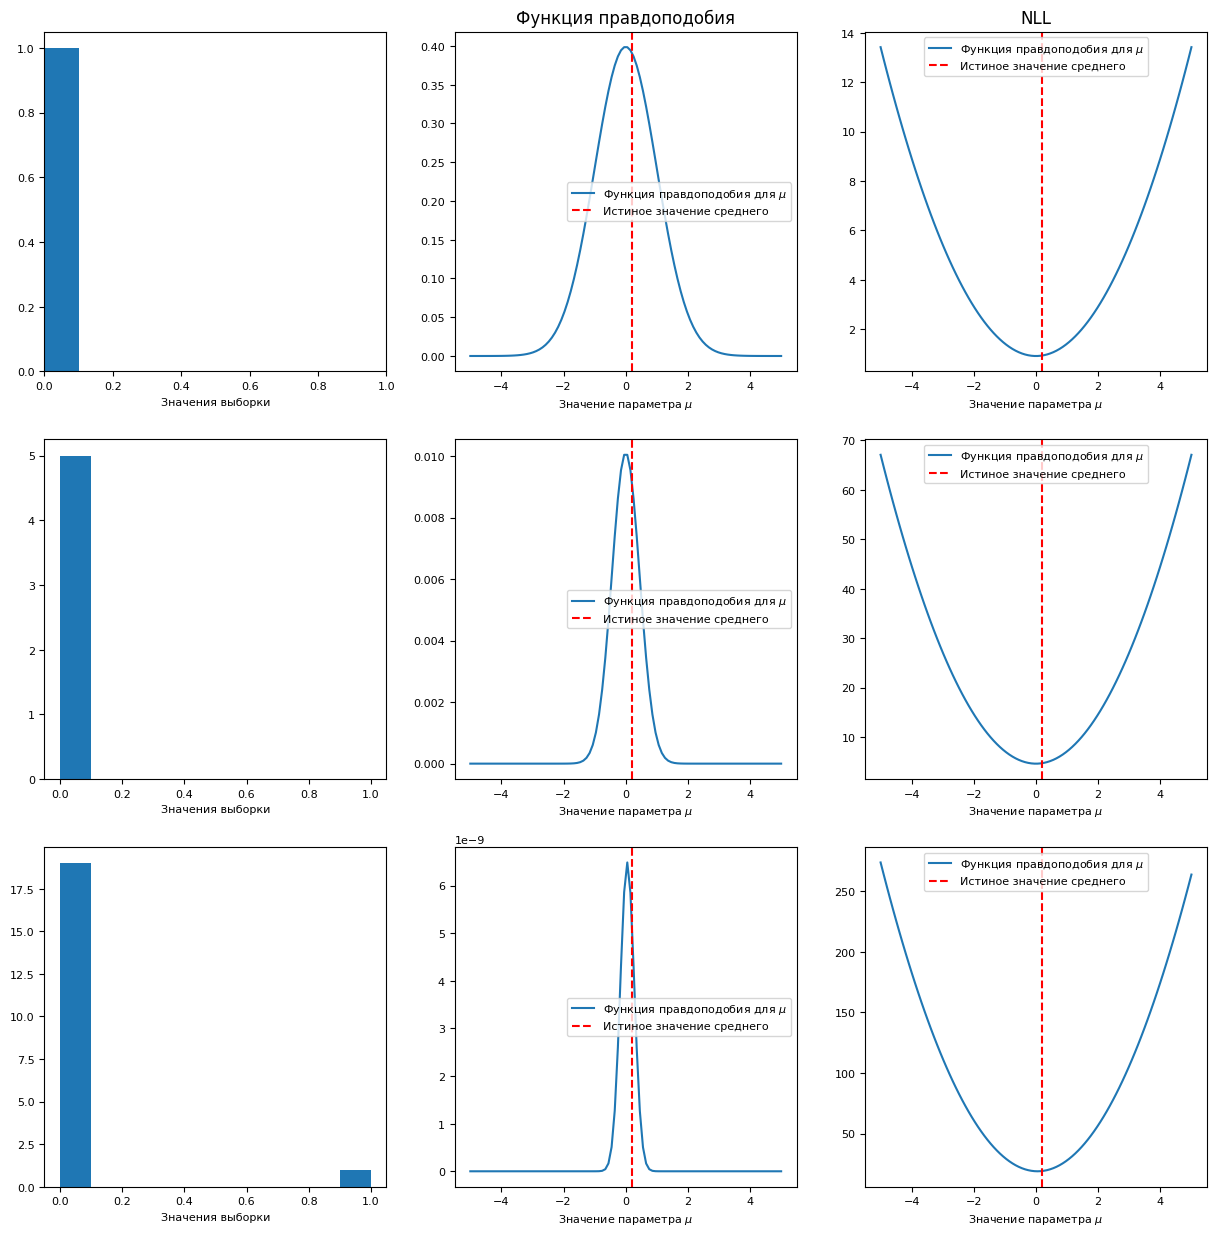

In [8]:
from scipy.stats import norm, bernoulli
import matplotlib.pyplot as plt
import numpy as np

t_true = 0.2
x = bernoulli(t_true).rvs(size = 20)
model = norm
_x = np.linspace(-5, 5, 100)
likelihood_1 = np.array([model(i).pdf(x[0]) for i in _x])

likelihood_5 = []
for i in _x:
    likelihoood = 1
    for j in x[:-15]:
        likelihoood*=model(i).pdf(j) 
    likelihood_5.append(likelihoood)  


likelihood_20 = []
for i in _x:
    likelihoood = 1
    for j in x:
        likelihoood*=model(i).pdf(j) 
    likelihood_20.append(likelihoood)

f, ax = plt.subplots(3, 3, figsize = (15, 15))

ax[0,0].hist(x[0], range = (0, 1))
ax[0,0].set_xlim(0, 1)
ax[0,0].set_xlabel("Значения выборки")
ax[0,1].plot(_x, likelihood_1, label = "Функция правдоподобия для $\mu$")
ax[0,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение среднего')
ax[0,1].set_xlabel("Значение параметра $\mu$")
ax[0,1].set_title("Функция правдоподобия")
ax[0,1].legend()
ax[0,2].plot(_x, -np.log(likelihood_1), label = "Функция правдоподобия для $\mu$")
ax[0,2].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение среднего')
ax[0,2].set_xlabel("Значение параметра $\mu$")
ax[0,2].set_title("NLL")
ax[0,2].legend()

ax[1,0].hist(x[:-15], range = (0, 1))
ax[1,0].set_xlabel("Значения выборки")
ax[1,1].plot(_x, likelihood_5, label = "Функция правдоподобия для $\mu$")
ax[1,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение среднего')
ax[1,1].set_xlabel("Значение параметра $\mu$")
ax[1,1].legend()
ax[1,2].plot(_x, -np.log(likelihood_5), label = "Функция правдоподобия для $\mu$")
ax[1,2].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение среднего')
ax[1,2].set_xlabel("Значение параметра $\mu$")
ax[1,2].legend()
ax[2,0].hist(x, range = (0, 1))
ax[2,0].set_xlabel("Значения выборки")
ax[2,1].plot(_x, likelihood_20, label = "Функция правдоподобия для $\mu$")
ax[2,1].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение среднего')
ax[2,1].set_xlabel("Значение параметра $\mu$")
ax[2,1].legend()
ax[2,2].plot(_x, -np.log(likelihood_20), label = "Функция правдоподобия для $\mu$")
ax[2,2].axvline(t_true, ls = '--', color = 'red', label = 'Истиное значение среднего')
ax[2,2].set_xlabel("Значение параметра $\mu$")
ax[2,2].legend()

Видно, что мы успешно посчитали функцию правдоподобия. В самом деле, если выборка не выходит за область определения модели - мы можем посчтитать функцию правдоподобия. Соответсвтенно, мы можем даже выбрать парамтеры модели при которых модель будет наилучшим образом описывать данные.

    В примере выше мы обнаружили, что наилучшее нормальное распределение описывающее выборку Бернулли будет иметь среднее соответствующее среднему выборки - интуитивно понятный результат.

Но так же ясно, что глядя на функцию правдоподобия для выбраной модели невозможно сказать подходит ли эта модель к данным или нет. В общем случае мы не знаем модель лежащую в основе данных. Можно, однако, сравнить функции правдоподобия полученные для разных моделей.

Для выборки выше сравним максимумы функцй правдоподобия полученные для разных моделей: расрпеделения Бернулли, нормалное, и экспоненциальное. Для каждого из распределений мы найдем значения параметров обеспечивающие максимум функци правдоподобия и сравним распределения полученные с этими параметрами. 

<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:45: SyntaxWarning: invalid escape sequence '\l'
<>:52: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:45: SyntaxWarning: invalid escape sequence '\l'
<>:52: SyntaxWarning: invalid escape sequence '\l'
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/164641301.py:39: SyntaxWarning: invalid escape sequence '\l'
  ax[0].vlines(_x, 0, 10*bernoulli(x.mean()).pmf(_x), color='red', linestyles='-', lw=3, label = "Лучшая модель ($-\log\mathcal{L}="+str(round(best_bernoulli, 0))+"$)")
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/164641301.py:45: SyntaxWarning: invalid escape sequence '\l'
  ax[1].plot(_x, norm(x.mean(), best_sigma).pdf(_x), color = 'red', label = "Лучшая модель ($-\log\mathcal{L}="+str(round(best_norm, 0))+"$)")
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/164641301.py:52: SyntaxWarning: invalid escape sequence '\l'
  ax

Text(0.5, 1.0, 'Экспоненциальное распределение')

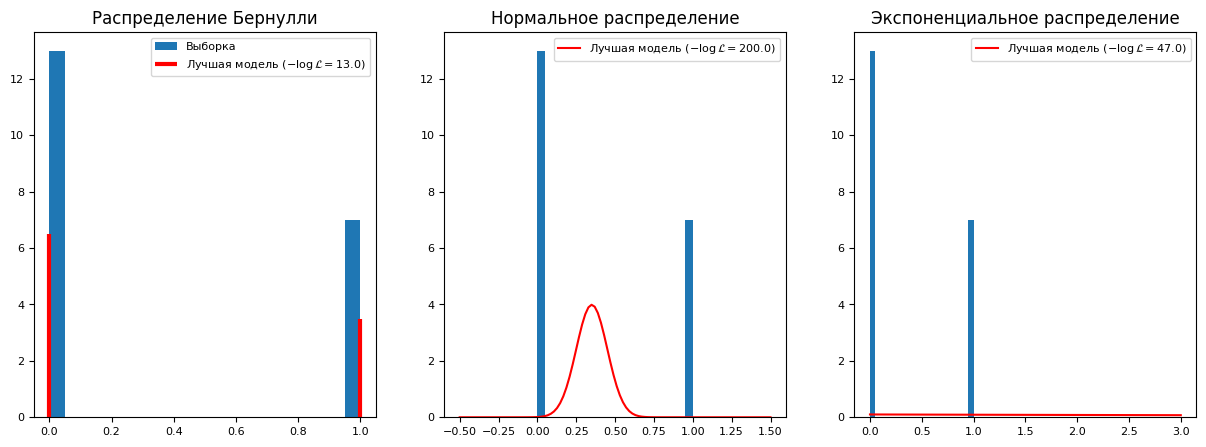

In [9]:
from scipy.stats import norm, bernoulli, expon
import matplotlib.pyplot as plt
import numpy as np

t_true = 0.5
x = bernoulli(t_true).rvs(size = 20)

log_likelihood = 0
for j in x:
    log_likelihood+=np.log(bernoulli(x.mean()).pmf(j))

best_bernoulli = -log_likelihood

_sigma = np.linspace(0.1, 5, 100)
best_sigma = 0.1
best_norm = 0
for s in _sigma:
    likelihood = 0
    for k in x:
        likelihood+=np.log(norm(x.mean(),s).pdf(k))
    if (-likelihood)>best_norm:
        best_norm = -likelihood
        best_sigma = s

best_expon = 0
best_lambda = 0
_a = np.linspace(0.1, 10, 100)
for a in _a:
    likelihood = 0
    for k in x:
        likelihood+=np.log(expon(scale = 1./a).pdf(k))
    if (-likelihood)>best_expon:
        best_expon = -likelihood
        best_lambda = a
        
f, ax = plt.subplots(1, 3, figsize = (15, 5))
_x = [0, 1]
ax[0].hist(x, bins = 20, label = "Выборка")
ax[0].vlines(_x, 0, 10*bernoulli(x.mean()).pmf(_x), color='red', linestyles='-', lw=3, label = "Лучшая модель ($-\log\mathcal{L}="+str(round(best_bernoulli, 0))+"$)")
ax[0].legend()             
ax[0].set_title("Распределение Бернулли")

_x = np.linspace(-0.5, 1.5, 100)
ax[1].hist(x, bins = 20)
ax[1].plot(_x, norm(x.mean(), best_sigma).pdf(_x), color = 'red', label = "Лучшая модель ($-\log\mathcal{L}="+str(round(best_norm, 0))+"$)")
ax[1].legend()             
ax[1].set_title("Нормальное распределение")
ax[1].legend()             

_x = np.linspace(0, 3, 100)
ax[2].hist(x, bins = 20)
ax[2].plot(_x, expon(scale = 1./best_lambda).pdf(_x), color = 'red', label = "Лучшая модель ($-\log\mathcal{L}="+str(round(best_expon, 0))+"$)")
ax[2].legend()             
ax[2].set_title("Экспоненциальное распределение")
        

Все три модели выше позволили выбрать "наилучшую" модель. Три наилучшлих модели (с наиболее правдоподобными параметрами) изображены на рисунке красным. Значения функции правдоподобия для наилучших моделей свидетельствуют в пользу распределения Бернулли. Открытым остается вопрос насколько статистически достоверный такой вывод. Мы рассмотрим его при разговоре о проверке гипотез.

## Параметр как случайная величина

Функция правдоподобия описывает распределение параметров модели. Если считать параметры случайными величинами, то можно рассматривать функцию правдоподобия как функцию плотности вероятности этих случайных величин - при наличии соответсвующей нормировки:

$$ P(\theta|X) = \frac{\mathcal{L}(\theta|X)}{\int\mathcal{L}(\theta|X)d\theta} $$

Эта величина называется "апостериорной функцией плотности вероятности параметра $\theta$ при плоском априорном распределении". Отметим, что это сугубо байесовский подход. В классической статистике параметр модели не являеся случайной величиной, поэтому постериорная вероятность лишена смысла. Руководствуясь практическими соображениями, мы будем в дальнейшем по умолчанию придерживаться байесовской тарктовки.

Допустим теперь, что у нас уже было какое-то представление о распределении параметра нашей модели _до_ проведения эксперимента. Мы могли составить их исходя из каких-то общих соображений или предыдущих экспериментов. Выраженное в форму функции плотности вероятности это знание является априорным распределением.

Например, готовя эксперимент по изучению влияния дизайна сайта на конверсию пользователей, разумно предположить что изменение потока, скажем, будет в районе 10%. Хорошим априорным представлением о новом среднем значении конверсии было бы нормальное распределение с центром в предыдущем значении и ширной в 10%. Таким образом, если предыдущее значение конверсии было 20%, можно предположить что новое значение конверсии - это случайная величина распределенная по закону $\mathcal{N}(20, 2)$.

### Байесовский вывод

Как объединить существующие априрорные знания с результатами эксперимента? На помощь приходит формула Байеса. Пусть мы знаем что параметр $\theta$ распределен по какому-то априорному закону $P(\theta)$. Совместная вероятность наблюдения выборки $X$ зависит от значений параметра $\theta$ и описывается как $P(X|\theta)$ - это функция правдоподобия. Значения парамтера $\theta$ распределены как $P(\theta|X)$. Эту величину несложно найти по (полной) формуле Байеса:

$$ P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)} =  \frac{P(X|\theta)P(\theta)}{\int P(X|\theta)P(\theta)d\theta}\equiv \frac{\mathcal{L}(\theta|X)P(\theta)}{\int \mathcal{L}(\theta|X)P(\theta)d\theta}$$

Формула выше дает способ обновления наших исходных знаний ($P(\theta)$) с помощью результатов эксперимента $\mathcal{L}(\theta|X)$. Эта процедура называется байесовским апдейтом (bayessian update), или байесовским выводом. Заметим, что механизм апдейта (произведений функций плотности вреоятности) зашит в самом способе вычисления функции правдоподобия. Таким образом, если мы будем обновлаять распредленеие параметра $\theta$ для каждого следующего измерения выборки $X$ мы придем к тому же результату как если бы мы учли всю выборку сразу:

$$P_{n+1}(\theta|x_{n+1}) = \frac{P(x_{n+1}|\theta)P_n(\theta)}{\int \mathcal{L}(\theta|x_{n+1})P_n(\theta)d\theta} = \frac{P(x_{n+1}|\theta)P(x_{n}|\theta)P_{n-1}(\theta)}{...}=...=\frac{\prod_{i = 1...n+1} P(x_{i}|\theta)\times P_0(\theta)}{...}\equiv\frac{\mathcal{L}(\theta|X) \times P_0(\theta)}{...}$$

Для краткости мы опустили выражение в знаменателе, а $P_0$ является априорным распределением.

Рассмотрим байесовский вывод на наглядном примере. Допустим, мы хотим определить среднее значение Пуассоновского распределения в ходе эксперимента. До начала эксперимента мы верим что среднее значение находится где-то между 1 и 3, и мы выбираем равномерное распределение для описания априорной вероятности. Посмотрим как будет меняться постерироная вероятность с набором данных. Для иллюстрации эффекта априорного распредедения, проведем те же операции но с экспоненциальным априорным распределением.

/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/454424510.py:21: RuntimeWarning: divide by zero encountered in log
  nll-=np.log(poisson(i).pmf(j))


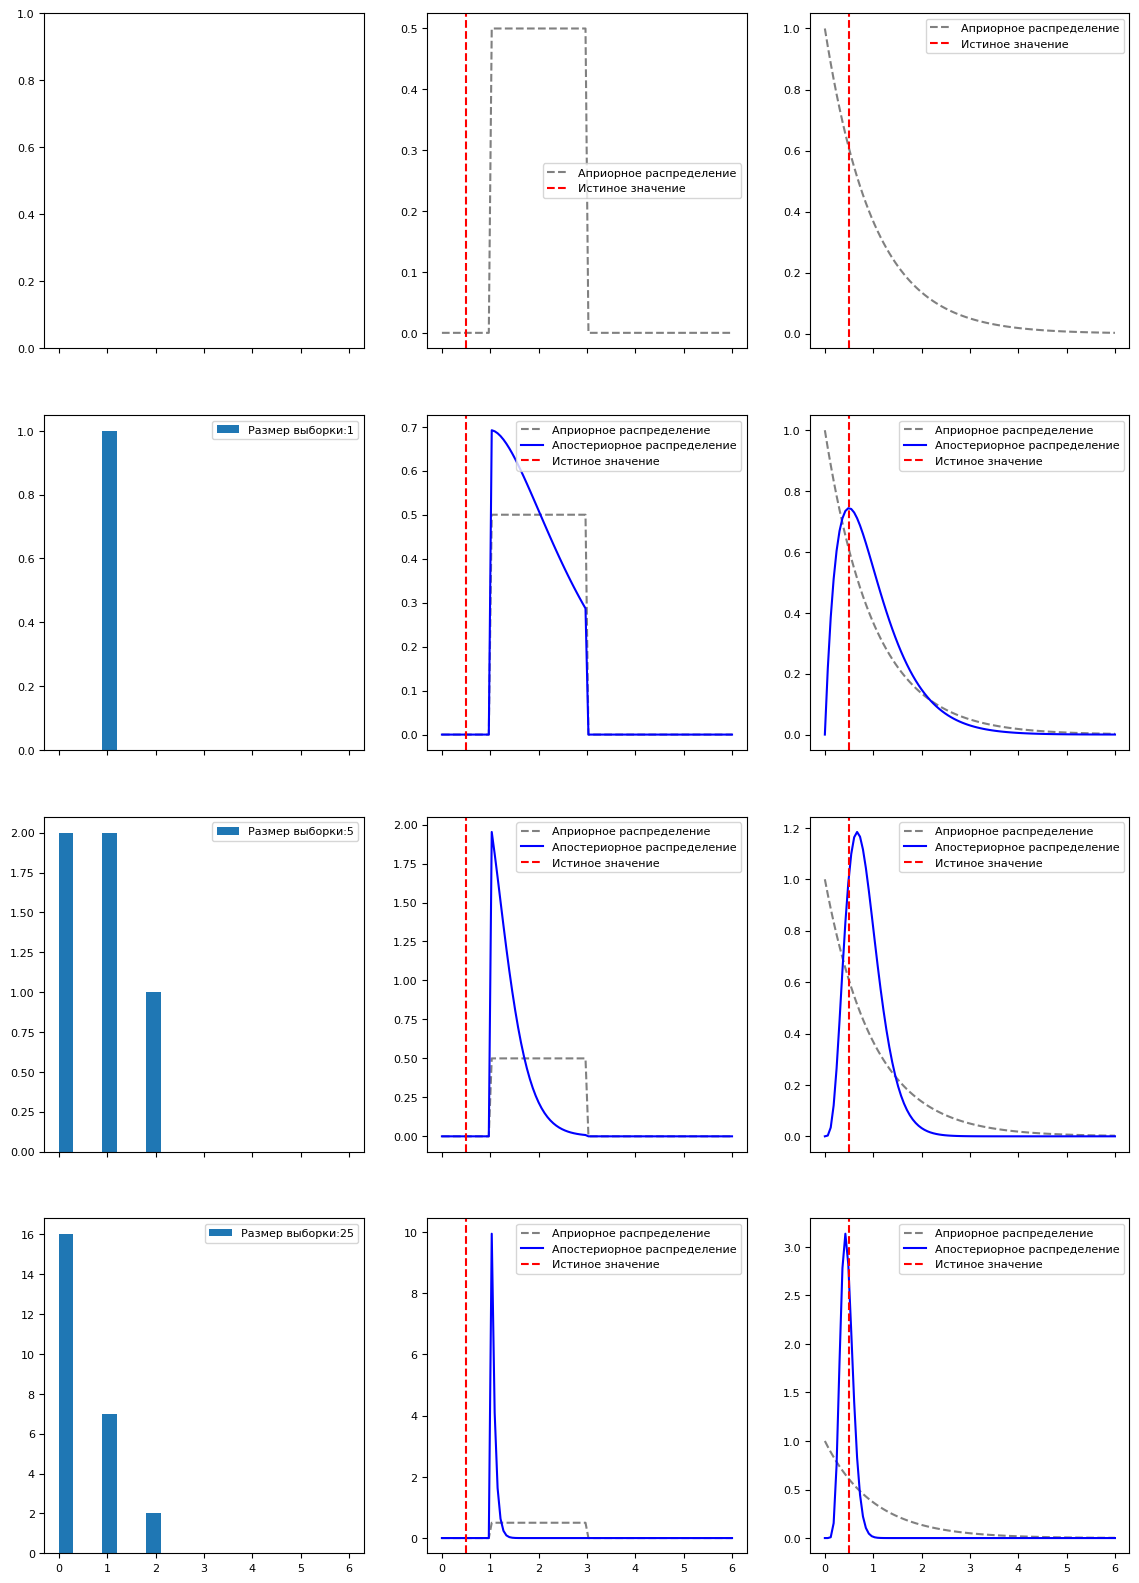

In [10]:
from scipy.stats import poisson, uniform, expon
import matplotlib.pyplot as plt
import numpy as np

sample_sizes = [1, 5, 25]
mu_true = 0.5

sample = poisson(mu_true).rvs(size = sample_sizes[-1])
_x = np.linspace(0, 6, 100)
prior_u = np.array([uniform(loc = 1, scale = 2).pdf(i) for i in _x])
prior_e = np.array([expon().pdf(i) for i in _x])

posteriors_u = []
posteriors_e = []

for s in sample_sizes:
    likelihood_s = []
    for i in _x:
        nll = 0
        for j in sample[0:s]:
            nll-=np.log(poisson(i).pmf(j))
        likelihood_s.append(nll)  
    likelihood_s = np.array(likelihood_s)
    likelihood_s-=np.min(likelihood_s)
    likelihood_s = np.exp(-likelihood_s)
    posterior_s_u = prior_u*likelihood_s/np.sum(likelihood_s*prior_u)*len(_x)/6
    posteriors_u.append(posterior_s_u)
    posterior_s_e = prior_e*likelihood_s/np.sum(likelihood_s*prior_e)*len(_x)/6
    posteriors_e.append(posterior_s_e)    


f, ax = plt.subplots(len(sample_sizes)+1, 3, figsize = (14, 5*(len(sample_sizes)+1)), sharex = True)

ax[0,1].plot(_x, prior_u,  color = "gray", ls = "--", label = "Априорное распределение")
ax[0,2].plot(_x, prior_e,  color = "gray", ls = "--", label = "Априорное распределение")
ax[0,1].axvline(mu_true, ls = '--', color = 'red', label = 'Истиное значение')
ax[0,2].axvline(mu_true, ls = '--', color = 'red', label = 'Истиное значение')
ax[0,1].legend()
ax[0,2].legend()
for i, s in enumerate(sample_sizes):
    ax[i+1,0].hist(sample[0:s], label = "Размер выборки:"+str(s), bins = 20, range = [0, 6])
    ax[i+1,0].legend()
    ax[i+1,1].plot(_x, prior_u, label = "Априорное распределение", color = "gray", ls = "--")
    ax[i+1,1].plot(_x, posteriors_u[i], label = "Апостериорное распределение", color = "blue")
    ax[i+1,1].axvline(mu_true, ls = '--', color = 'red', label = 'Истиное значение')
    ax[i+1,1].legend()
    ax[i+1,2].plot(_x, prior_e, label = "Априорное распределение", color = "gray", ls = "--")
    ax[i+1,2].plot(_x, posteriors_e[i], label = "Апостериорное распределение", color = "blue")
    ax[i+1,2].axvline(mu_true, ls = '--', color = 'red', label = 'Истиное значение')
    ax[i+1,2].legend()    


Видно, что распределение приобретает форму нормального и сходится к истиному значению с ростом выборки. Влиаение априорнго распределения снижается с ростом выборки. Важно отметить, что экспоненциальный праер оказывается более выгоден чем равномерный - если бы мы не угадали границы, то апостериорное распределение сошлось бы не к истиному значениею а к краю диапазона.

### Многомерные функции правдоподобия и мешающие параметры

Модель выбранная для описания данных может иметь больше одного параметра. Так, при описании данных нормальным распределением, функция правдоподобия будет функцией двух переменных - среднего $\mu$ и дисперсии $\sigma^2$:

<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\l'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\l'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\l'
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/3669497014.py:37:

Text(0.5, 1.0, '$-\\log\\mathcal{L}(\\mu,\\sigma)$')

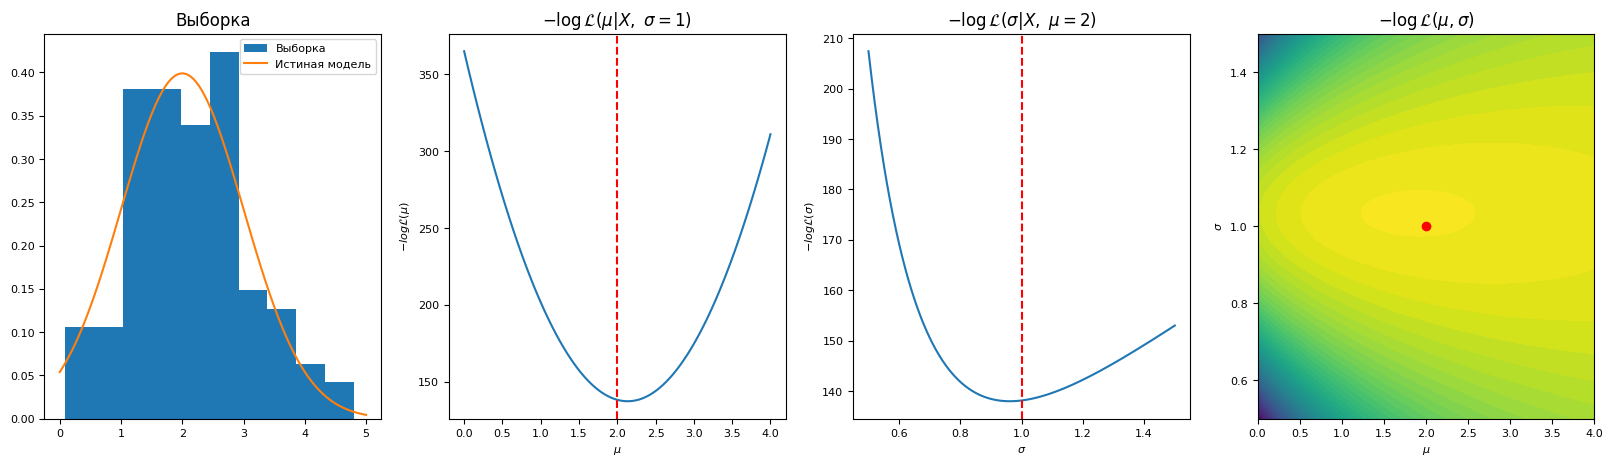

In [11]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

x = norm(2, 1).rvs(100)

# Наложим сверху функцию плотности вероятности
xv = np.linspace(0, 5, 100)
yv = norm(2,1).pdf(xv)

pdfs = -np.log(norm(2,1).pdf(x))

likelihood = reduce(lambda x, y: x+y,pdfs)


n_mus = 101
n_sigmas = 101

mus = np.linspace(0, 4, n_mus)
sigmas = np.linspace(0.5,1.5, n_sigmas)

logL = np.zeros((n_mus,n_sigmas))
for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        logL[i,j] = np.log(norm(mu,sigma).pdf(x)).sum()

f, ax = plt.subplots(1, 4, figsize = (20, 5))
# Построим распределение
ax[0].hist(x, density = True, label = "Выборка")
ax[0].plot(xv,yv, label = "Истиная модель")
ax[0].set_title("Выборка")
ax[0].legend()

ax[1].plot(mus,-logL.T[int(n_sigmas/2)])
ax[1].axvline(2, color = "red", ls = "--")
ax[1].set_xlabel("$\mu$")
ax[1].set_ylabel("$-log\mathcal{L}(\mu)$")
ax[1].set_title("$-\log\mathcal{L}(\mu|X,\ \sigma = 1)$")

ax[2].plot(sigmas,-logL[int(n_mus/2)])
ax[2].axvline(1, color = "red", ls = "--")
ax[2].set_xlabel("$\sigma$")
ax[2].set_ylabel("$-log\mathcal{L}(\sigma)$")
ax[2].set_title("$-\log\mathcal{L}(\sigma|X,\ \mu = 2)$")

h = ax[3].contourf(mus, sigmas, logL, 50)#, cmap='RdGy')
ax[3].scatter([2],[1], label = "Истиный набор параметров", color = "red")
ax[3].set_xlabel("$\mu$")
ax[3].set_ylabel("$\sigma$")
ax[3].set_title("$-\log\mathcal{L}(\mu,\sigma)$")


Если объектом исследования являются только часть параметров модели (например, среднее), то остальные параметры (например, дисперсия) считаются _мешающими параметрами_ (nuisance parameters). В этом случае, вместо полной функции правдоподобия можно использовать _марг(ж)инализованную функцию правдоподобия_ (marghinalised likelihood), которая усреднена по мешающим парметрам. Например, вот как можно маргинализировать нормальную функцию правдоподобия по дисперсии:
$$P(X|\mu) = \int P(X|\mu,\sigma) P(\sigma)d\sigma$$
Тут, $P(\sigma)$ является априорным расрпеделением мешающего параметра.

На практике такая маргинализация зачастую требует численных методов и, как следствие, довольно ресурсоемка. Поэтому для "быстрой" оценки можно использовать аппроксимацию плагина (plug-in approximation). В рамках этой аппроксимации априорное распределение параметра заменяется дельта-функцией с пиком на значении параметра обеспечивающего максимум функции правдоподобия:

$$P(X|\mu) = \int P(X|\mu,\sigma) P(\sigma)d\sigma\approx \int P(X|\mu,\sigma) \delta(\sigma-\sigma\prime)d\sigma = P(X|\mu,\sigma\prime)$$

Именно так получены сканы функци правдоподобия на рисунке выше.


# Вычисление апостериорного распределения

## Сопряженное априорное распределение (conjugate prior)
В примерах выше мы определяли форму апостерирорного распределения численно. Но можно ли найти его аналитическое выражение? Оказывается, что да - для некоторых комбинаций ариорного распределениея и модели. Априорное распределение $P(\theta)\in\mathcal{F}$ является сопряженным (conjugate prior) к функци правдоподобия $\mathcal{L}(\theta|X)$ если апостериорное распределеление принадледит к тому же семейству функий: $P(\theta|X)\in\mathcal{F}$. Другими словани, априорное распределние является сопраженным если байесовский апдейт сводится к изменению параметров априорного распределения, но не его формы. На практике при выборе апирорного распределениея имеет смысл отдать предпочтение именно сопряженному априорному распределению (при отсутствии серьезных причин выбрать другую модель).

### Бета-биномиальная модель

Рассмотрим случайную величину принимающую (независимые и идентично распределенные) значения 0 или 1. Пусть в случайной выборке $(x_1, x_2, ..., x_n)$ оказалось $N_0$ нулей и $N_1$ единиц. Найдем вероятность обнаружения такого набора данных используя распределене Бернулли со средним $\theta$:

$$P(N_0, N_1|\theta) = \prod_{n=1}^{N_0+N_1}\theta^{x_n}(1-\theta)^{1-x_n} = \theta^{N_1}(1-\theta)^{N_0}$$

Схожий вид (с точностью до множителя) функция правдоподгобия будет иметь если мы будем использовать биноминальноую модель. При проведении $N=N_0+N_1$ экспериментов Бернулли и число $N_1$ описывается биномиальным распределением:

$$P(N_1|\theta, N) = Bin(N_1|N, \theta) =  \binom{N}{N_1}\theta^N_1(1-\theta)^{N-N_1}$$

Обе функции правдоподобия имет схожий вид относительно параметра $\theta$, поэтому выводы относительно распредеения $\theta$ будут применимы для обоих моделей.

Попробуем найти сопряженное априорное распределение для параметра $\theta$. Для того чтобы постерирорное распределение было бы в том же семействе функций что и априорное после умножения на функцию правдоподобия, хорошим выбором априорного распределения будет Бета распределение:

$$P(\theta) \sim \theta^{a-1}(1-\theta)^{b-1} = Beta(\theta|a,b)$$

В самом деле, посмотрим на постериорное распределение после умножения априорного Бета-распределения на функцию правдоподобия:

$$P(\theta|N_0, N_1)\sim  \theta^{N_1}(1-\theta)^{N_0}\theta^{a-1}(1-\theta)^{b-1} = \theta^{N_1+a-1}(1-\theta)^{N_0+b-1}\sim Beta(\theta|a+N_1,b+N_0)\equiv Beta(\theta|\hat{a},\hat{b})$$

Видно, что форм распределения осталась той же, и байесовский апдейт поризошел через изменение параметров распределения: $\hat{a} = a+N_1$, $\hat{b} = b+N_0$.

Параметры априорного распределения $a$ и $b$ являются гиперпараметрами. В данном случае (эксперимент Бернулли) эти параметры играют ту же роль что и количество наблюдений 1 и 0, поэтому их называют псевдо-измерениями (pseudo-counts). Рассмотрим эволюцию апостериорного распределения для разных значений гиперпараметров $a$ и $b$.


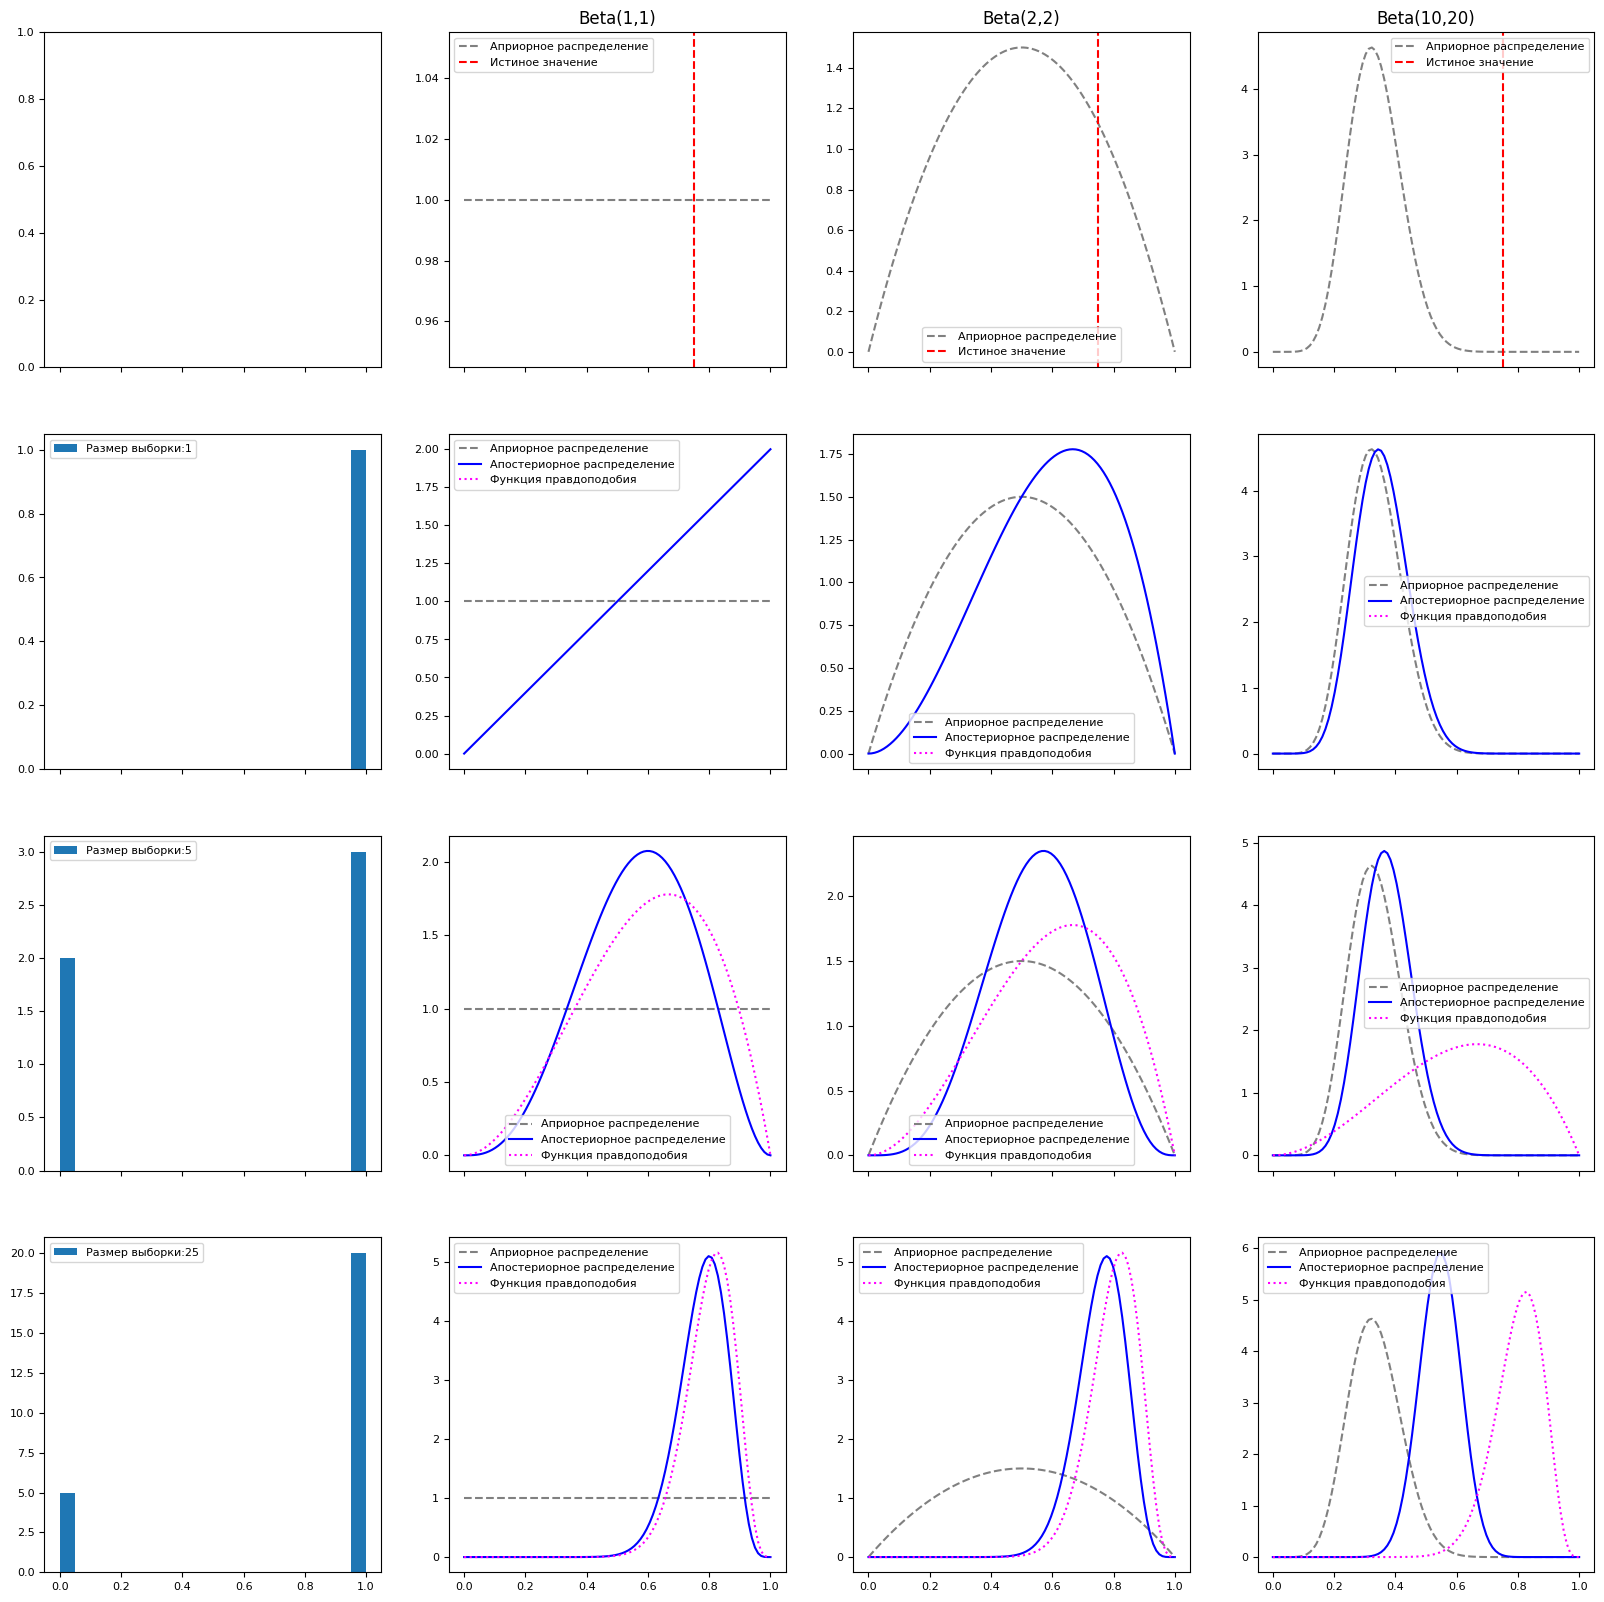

In [12]:
from scipy.stats import beta, bernoulli
import matplotlib.pyplot as plt
import numpy as np

sample_sizes = [1, 5, 25]
mu_true = 0.75

sample = bernoulli(mu_true).rvs(size = sample_sizes[-1])
_x = np.linspace(0, 1, 100)
hyperpars = [[1,1],
             [2,2],
            [10,20]]

priors = []
for p in hyperpars:
    priors.append(np.array([beta(p[0],p[1]).pdf(i) for i in _x]))

likelihoods = []
posteriors = []

for s in sample_sizes:
    posteriors.append([])
    N_1 = np.sum(sample[0:s])
    N_0 = s - N_1
    likelihood_s = []

    for i in _x:
        likelihood_s.append(beta(N_1, N_0).pdf(i)) 
        
    likelihoods.append(likelihood_s)

    for p in hyperpars:
        posterior_s = []
        for i in _x:
            posterior_s.append(beta(N_1+p[0], N_0+p[1]).pdf(i)) 
        posteriors[-1].append(posterior_s)

f, ax = plt.subplots(len(sample_sizes)+1, len(priors)+1, figsize = (5*(len(priors)+1), 5*(len(sample_sizes)+1)), sharex = True)

for j, p in enumerate(priors):    
    ax[0,j+1].plot(_x, p,  color = "gray", ls = "--", label = "Априорное распределение")
    ax[0,j+1].axvline(mu_true, ls = '--', color = 'red', label = 'Истиное значение')
    ax[0,j+1].legend()
    ax[0,j+1].set_title("Beta("+str(hyperpars[j][0])+","+str(hyperpars[j][1])+")")
for i, s in enumerate(sample_sizes):
    ax[i+1,0].hist(sample[0:s], label = "Размер выборки:"+str(s), bins = 20, range = [0, 1])
    ax[i+1,0].legend()
    for j, p in enumerate(priors):    
        ax[i+1,j+1].plot(_x, p, label = "Априорное распределение", color = "gray", ls = "--")
        ax[i+1,j+1].plot(_x, posteriors[i][j], label = "Апостериорное распределение", color = "blue")
        ax[i+1,j+1].plot(_x, likelihoods[i], label = "Функция правдоподобия", color = "magenta", ls = ':')       
        ax[i+1,j+1].legend()


При установке параметров $a = b = 1$, априорное распределение превращается в равномерное - _неинформативный праер_ (uninformative prior). Параметры $a = b = 2$ соответсвуют слабой вере в то что истиное значение где-то около 0.5 Такой праер соответсвует псевдо-выборке из двух значений (0, 1). Последний столбец рисунка выше соответует "сильному" априорному распределению - он соответсвует 28 значениям псевдо-выборки. Значения параметров $a$ и $b$ нарочно выбраны неправильно. Видно, что функция правдоподобия на малых выборках практически не смещает апостериорное распределенеие в "нужную" сторону. 

Бета-распределение не единственное сопряженное распределение к биномиальному процессу. Например, линейная комбинация бета-распределений тоже может служить сопряженным прайером. Представьте что в серии экспериментов по броску монетки вы верите что монетка может быть "честная" - то есть она выпадает орлом и решкой примерно поровну, но так же она может быть шулерской и тогда она будет выпадать одной стороной чаще чем другой. Такое априорное веровние можно формализовать следующей функцией параметра $\theta$ (вероятности монетки выпасть орлом):

$$P(\theta) = 0.5\ Beta(\theta|20,20)+0.5\ Beta(\theta|90, 10)$$

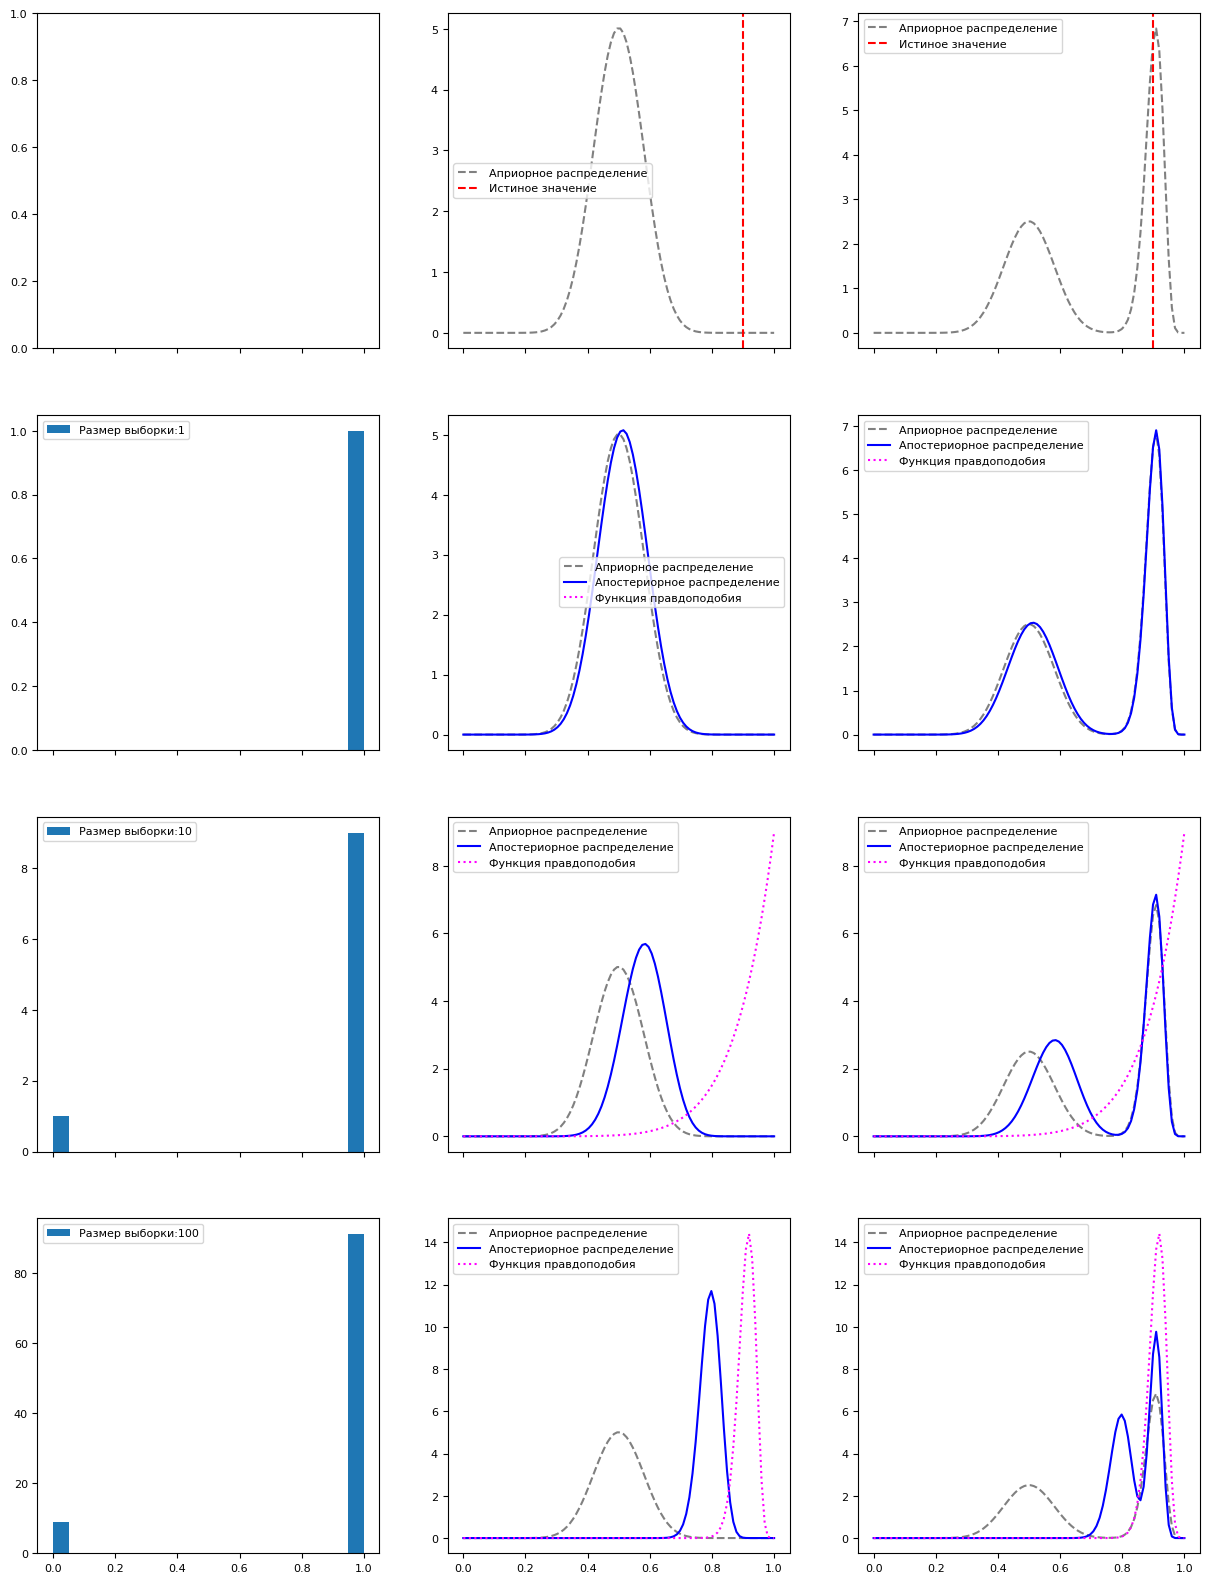

In [13]:
from scipy.stats import beta, bernoulli
import matplotlib.pyplot as plt
import numpy as np

sample_sizes = [1, 10, 100]
mu_true = 0.9

sample = bernoulli(mu_true).rvs(size = sample_sizes[-1])
_x = np.linspace(0, 1, 100)


prior_1 = np.array([beta(20,20).pdf(i) for i in _x])
prior_2 = np.array([0.5*beta(20,20).pdf(i) + 0.5*beta(90,10).pdf(i) for i in _x])

likelihoods = []
posteriors_1 = []
posteriors_2 = []

for s in sample_sizes:
    posteriors.append([])
    N_1 = np.sum(sample[0:s])
    N_0 = s - N_1
    likelihood_s = []

    for i in _x:
        likelihood_s.append(beta(N_1, N_0).pdf(i)) 
        
    likelihoods.append(likelihood_s)

    posterior_s = []
    for i in _x:
        posterior_s.append(beta(N_1+20, N_0+20).pdf(i)) 
    posteriors_1.append(posterior_s)
    
    posterior_s = []
    for i in _x:
        posterior_s.append(0.5*beta(20+N_1,20+N_0).pdf(i) + 0.5*beta(90+N_1,10+N_0).pdf(i)) 
    posteriors_2.append(posterior_s)    

posteriors = [posteriors_1, posteriors_2]
f, ax = plt.subplots(len(sample_sizes)+1, 3, figsize = (15, 5*(len(sample_sizes)+1)), sharex = True)

for j, p in enumerate([prior_1, prior_2]):    
    ax[0,j+1].plot(_x, p,  color = "gray", ls = "--", label = "Априорное распределение")
    ax[0,j+1].axvline(mu_true, ls = '--', color = 'red', label = 'Истиное значение')
    ax[0,j+1].legend()
for i, s in enumerate(sample_sizes):
    ax[i+1,0].hist(sample[0:s], label = "Размер выборки:"+str(s), bins = 20, range = [0, 1])
    ax[i+1,0].legend()
    for j, p in enumerate([prior_1, prior_2]):    
        ax[i+1,j+1].plot(_x, p, label = "Априорное распределение", color = "gray", ls = "--")
        ax[i+1,j+1].plot(_x, posteriors[j][i], label = "Апостериорное распределение", color = "blue")
        ax[i+1,j+1].plot(_x, likelihoods[i], label = "Функция правдоподобия", color = "magenta", ls = ':')       
        ax[i+1,j+1].legend()


Мы видим, что в случае шулерской монетки наше предположение подтвердистя быстрее - часть априорной функци плотности вероятности соотествующая вере в честную монету будет смещаться к истиному значнию, тогда как верная гиоптеза будет получать все больше подтверждений. Можно показать, что такое априорное распределение позволит быстрее принять решение о том что монетка шулерская.

### Нормальные распределения

Как можно было бы ожидать, сопряженным априорным распределением к Гауссовской функции правдоподобия является Гауссовское же распределение.

Допустим мы фиксировали дисперсию модели $\sigma^2$. Тогда функция правдоподобия для среднего $\mu$ можно записать следующим образом:

$$P(X|\mu) \sim \prod e^{-\frac{(x_i-\mu)^2}{2\sigma^2}} \sim exp(-\frac{1}{2\sigma^2}\sum (x_i-\mu)^2)$$

Нормальное априорное распределение $P(\mu|m, s^2)$ сохраит свою функциональную форму при нормальном байесовском апдейте. Можно показать, что 

$$P(\mu|X)\sim exp(-\frac{1}{2\sigma^2}\sum (x_i-\mu)^2)\times exp(-\frac{(\mu-m)^2}{2s^2}) \sim e^{-\frac{(\mu-\bar{\mu})^2}{2\bar{\sigma}^2}}$$

где 

$$\bar{\sigma}^2 = \frac{\sigma^2s^2}{Ns^2+\sigma^2}$$
$$\bar{\mu} = \bar{\sigma}^2(\frac{m}{s^2}+\frac{\sum x_i}{\sigma^2})$$

Эти формулы удобнее трактовать введя параметр точности. Пусть точность измерения будет $k = 1/\sigma^2$, а априорная точность будет $\lambda = 1/s^2$. Тогда постериорная точность выражатеся как 

$$\bar{\lambda} = \lambda + Nk$$

Апостерироное среднее будет

$$\bar{\mu} = \frac{Nk}{\lambda + Nk}\bar{x} + \frac{\lambda}{\lambda + Nk}m$$

где $\bar{x}$ - среднее по выборке. Видно, что с ростом выборки точность будет расти (а значит дисперсия - падать), а среднее будет сходиться к среднему по выборке.

## Численные методы

Апостериорное распределение $P(\theta|X)$ можно вычислить зная функцию правдоподобия  $P(X|\theta)$ и априорное распределение $P(\theta)$. За исключенем (редких) случаев сопряженного априорного распределения вычисление апостериорного распределения практически невозможно аналитически и крайне ресурсоемко числено.  Это не удивительно - одна только функция правдоподобия в общем виде представляет собой произведение большого числа множителей (по одному на каждый элемент выборки). Поэтому логичным шагом кажется использование _приблизительного_ апостериорного распределения.

###  Сетевое приближение (grid approximation)

Самый простой способ построения приближенного распределения - это покрыть область определения сеткой, посчитать значения в узлах и аппроксимировать значения в новой точке значением в ближайщем узле. Именно так мы строили функции правдоподобия в примерах выше. В таком подходе неизвестный интеграл превращается в сумму по узлам:

$$\int P(X|\theta)P(\theta)d\theta \approx \sum_i P(X|\theta_i)P(\theta_i)$$

Несмотря на свою простоту, этот метод страдает от проклятия размерности - количетсво узлов растет экспоненциально с ростом числа измерений. Так что он подходит только для визуализации.

### Квадратичное приближение/Приближение Лапласа  (Quadratic/Laplace approximation)


При верном подборе модели для описания данных можно ожидать что функция правдоподобия (а следовательно и апостериорное распределение) будет стремиться к колоколообразной форме с ростом выборки - все более _правдоподобными_ будут казаться значения параметров близкие к истиным. Таким образом, апостерироное распределени можно аппроксимировать нормальным распределением со средним в максимуме функции  правдоподобия и шириной описываемой Гессианом вокруг максимума. Ни положение максимума $\bar{\theta}$, ни Гессиан $H$ не требуют вычисления интеграла:

$$P(\theta|X)\approx\mathcal{N}(\theta|\bar{\theta},H)$$

В одномерном случае Гессиан - это просто вторая прозводная ненормированного апостерироного распределения. В многомерном случае Гессиан является матрицей:

$$H_{ij} = \frac{dP(X|\boldsymbol{\theta})P(\boldsymbol{\theta})}{d\theta_id\theta_j}$$

### Вариационные методы

В приближении Лапласа мы выбрали семейство функций которые, по нашему мнению, должны описывать апостерирорное распределение (нормальные распределения) и выбрали из этого семейства ту функцию которая ближе всего к реальному распределению. Этот подход можно обобщить расширив семейство функций из которых мы производим выбор. Такой подход называется _вариационым выводом_ (variational inference). Формально,  мы ищем аналитическое распределние $q(\theta)$ из семейства функций $\mathcal{Q}$ для аппроксимации неизвестного $p(X, \theta)$  минимизирующее расстояние $D$ между двумя распределениями:

$$ q^*= \underset{q\in\mathcal{Q}}{\operatorname{argmin}}D(q,p) $$

Таким образом, конкретный вариацонный метод зависит от выбора семейства аналитических функций $\mathcal{Q}$ и меры расстояния между распределениям $D(q,p)$. Популярным выбором $D(q,p)$ является расстояние Ку́льбака — Ле́йблера:

$$D_{KL}(p || q) = \int dx p(x)\log \frac{p(x)}{q(x)}$$

Можно показать, что минимизация этой меры сводится к нахождению параметров функции $q$ обеспечивающих максимум функции правдоподобия на существующей выборке. Максимум функции правдоподобия модели $q$ называется Evidence Lower BOund (ELBO). Вариационный метод аппроксимации постериорного распределения с помощью расстояния Кульбака-Лейблера в качестве меры рассотяния между функциями называется методом максимизации ELBO.

### Монте-Карло с Марковскими Цепями

В прошлой лекции мы говорили об аппроксимации функции плотности вероятности методом Монте-Карло. Генеральная совокупность значений заменяется выборкой, а распределение - суммой дельта-функций:

$$p(x)\approx \frac{1}{N}\sum_i\delta(x-x_i)$$

Если бы мы могли сделать выборку значений $\theta_i$ из апостериорного распределениея $P(\theta|X)$, то можно было бы использовать её для аппроксимации этого распределения:

$$P(\theta|X)\approx \frac{1}{N}\sum_i\delta(\theta-\theta_i)$$

Но в апостерироном распределении $P(\theta|X)$ нам неизвестна нормировка (интеграл в знаменателе $\int P(X|\theta)P(\theta)d\theta$). Как сделать выборку из распределения определенного с точностью до множителя?

Рассмотрим алгоритм Метрополиса - Гастинга (Metropolis-Hastings). Этот алгоритм позволяет принять решение о включени нового элемента выборки. Алгоритм строится на марковском процессе - каждый новый элемент ищется отталкиваясь от последнегов включеного. Перед началом работы алгоритма помимо ненормированнного числителя (функции правдоподобия $P(X|\theta)$ и априорного распределения $P(\theta)$) нам необходимо выбрать совместное распределение $\hat{P}(\theta_{N+1}|\theta_{N})$ из которого будет выбираться новый кандидат  $\theta_{N+1}$ на включение в выборку исходя из последнего включенного значения $\theta_{N}$. В примере ниже мы будем считать что это распределение нормальное. При таком выборе мы не будем уходить слишком далеко от текущего значения.

- Допустим, у нас уже существует выборка из $N$ значений $(\theta_1, ..., \theta_N)$. Для последнего значения нам известно
ненормированное значение апостериорного распределения ($P(X|\theta_{N})P(\theta_{N})$)
- Мы выбираем новое случайное значение $\theta_{N+1}$ из распределения  $\hat{P}(\theta_{N+1}|\theta_{N})$
- Определяем новое ненормированное значение апостериорного распределения ($P(X|\theta_{N+1})P(\theta_{N+1})$)
- Определяем величину $\alpha$:

$$\alpha = \frac{P(X|\theta_{N+1})P(\theta_{N+1})\hat{P}(\theta_{N+1}|\theta_{N})}{P(X|\theta_{N})P(\theta_{N})\hat{P}(\theta_{N}|\theta_{N+1})}$$

Если $\hat{P}(\theta_{N+1}|\theta_{N})$ выбрано симметричным ( как в случае с нормальным распределением), то $\alpha$ является просто отношением апостериорных вероятностей:


$$\alpha = \frac{P(X|\theta_{N+1})P(\theta_{N+1})}{P(X|\theta_{N})P(\theta_{N})}\equiv\frac{P(\theta_{N+1}|X)}{P(\theta_{N}|X)}$$

- Если $\alpha>1$, то новая точка принадлежит к выборке с бОльшей вероятностью чем предыдущая. В этом случае мы включаем новую точку в выборку и начинаем процедуру для поиска следующей точки $\theta_{N+2}$

-   Если $\alpha\leq1$, то мы включаем новую точку в выборку с вероятностью $\alpha$. Если точка включаена, то мы ищем новую точку $\theta_{N+2}$ отталкиваясь от $\theta_{N+1}$. Если нет, то просто повотряем описаный цикл до включения новой точки $\theta_{N+1}$. Этот шаг позволяет алгоритму выходить из максимума функции правдоподобия и исследовать всю область определения.



Попробуем аппроксимировать нормальное распределение с помощью алгоритма Метрополиса-Гасинга

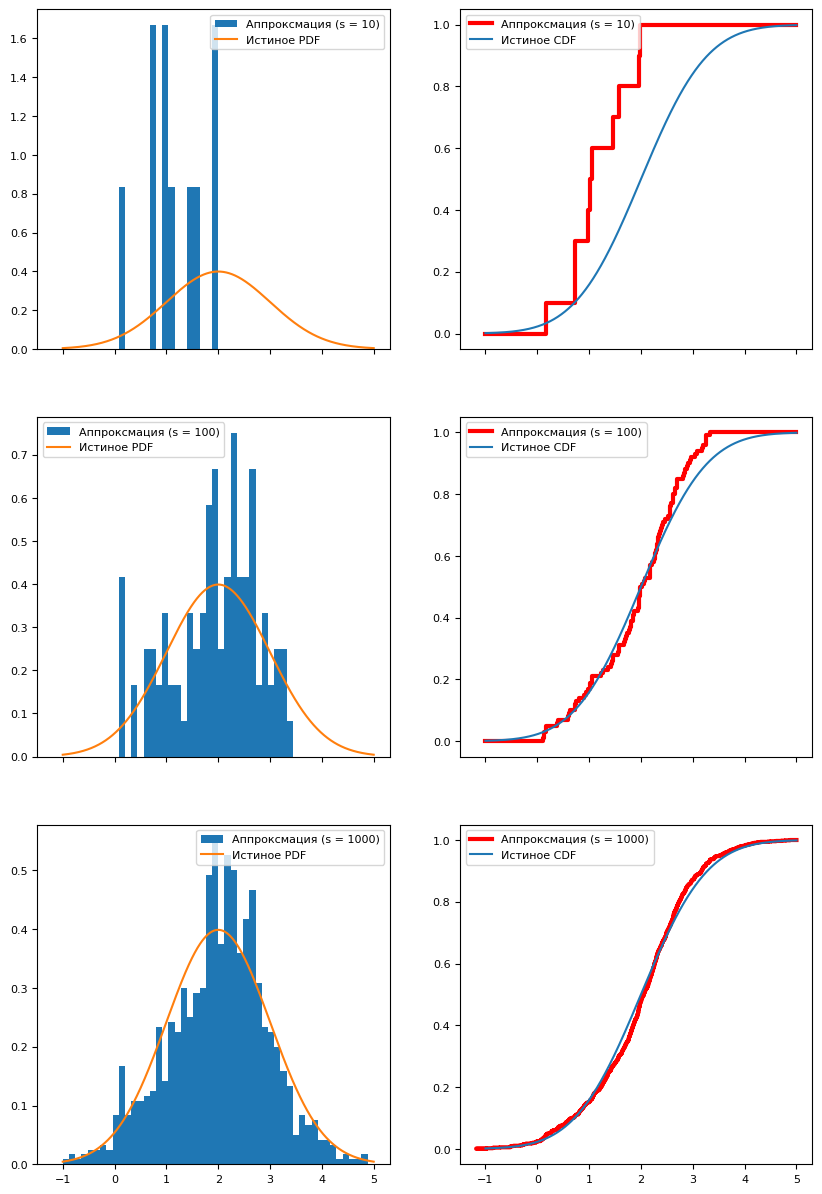

In [14]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

original_distribution = norm(loc = 2, scale = 1)
joint_distribution = norm
joint_scale = 0.5
x = np.linspace(-1, 5, 1000)
sample =  np.random.rand(1)

def mh_step(sample, joint_distribution = joint_distribution, joint_scale = joint_scale):
    # Getting candidate
    new_val = joint_distribution(loc = sample[-1], scale = joint_scale).rvs(1)
    
    # Getting alpha
    old_prob =  original_distribution.pdf(sample[-1])
    new_prob =  original_distribution.pdf(new_val)
    alpha = new_prob/old_prob
    
    # Deciding on inclusion
    chance = np.random.rand(1)
    if alpha[0]>=chance[0]:
        sample = np.append(sample, new_val)

    return sample

while sample.size<1001:
    sample = mh_step(sample)

sample_sizes = [10, 100, 1000]
cdfs = []
for s in sample_sizes:
    _sample = sample[:s]
    _sample = np.sort(_sample)
    _cdf = np.concatenate([[0,0],(np.ones((2, s))*np.linspace(1./s, 1, s)).T.reshape(2*s)])
    _cdf_x = np.concatenate([[-1],(np.ones((2, s))*_sample).T.reshape(2*s),[5]])
    cdfs.append([_cdf,_cdf_x])

f, ax = plt.subplots(len(sample_sizes), 2, figsize = (10, 5*(len(sample_sizes))), sharex = True)

for i, s in enumerate(sample_sizes):
    ax[i, 0].hist(sample[:s], range = [-1, 5], bins = 50, label = "Аппроксмация (s = "+str(s)+")", density = True)
    ax[i, 0].plot(x, original_distribution.pdf(x), label = "Истиное PDF")
    ax[i, 0].legend()

    ax[i, 1].plot(cdfs[i][1], cdfs[i][0], color='red', linestyle='-', lw=3, label = "Аппроксмация (s = "+str(s)+")")
    ax[i, 1].plot(x, original_distribution.cdf(x), label = "Истиное CDF")
    ax[i, 1].legend()

Видно, что распределение вероятности приближается к истиному с ростом статистики. Тем не менее, внимательный анализ приведенного алгоритма оставляет много вопросов. Например:

- Зависят ли результаты работы алгоритма от начального выбора? Что если мы выберем первую точку неудачно?
- Есть ли способ оптимизировать выбор следующей точки, так чтобы мы как можно реже отбрасывали неудачные точки?
- Чем руководтсоваться в выборе функции совместной вероятности для определения следующего шага?

Эти вопросы приводят к многочисленным вариантам алгоритмов MCMC и тонкостям их применения. Чуть более подробно ознакомиться с этой темой можно, например, [тут](https://nbviewer.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter3_MCMC/Ch3_IntroMCMC_PyMC2.ipynb) или [тут](https://elevanth.org/blog/2017/11/28/build-a-better-markov-chain/).

Метод MCMC применяется по умолчанию для получения выборки во многих пакетах статистического анализа. Рассмотрим пример использования библиотеки `pymc` для получения выборки из апостериорного распределения.

<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/1564941983.py:33: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel("$\mu$")
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/1564941983.py:34: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_title("Расрпеделение $\mu$")
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/1564941983.py:39: SyntaxWarning: invalid escape sequence '\s'
  ax[2].set_xlabel("$\sigma$")
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_34647/1564941983.py:40: SyntaxWarning: invalid escap

Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Text(0.5, 1.0, 'Расрпеделение $\\sigma$')

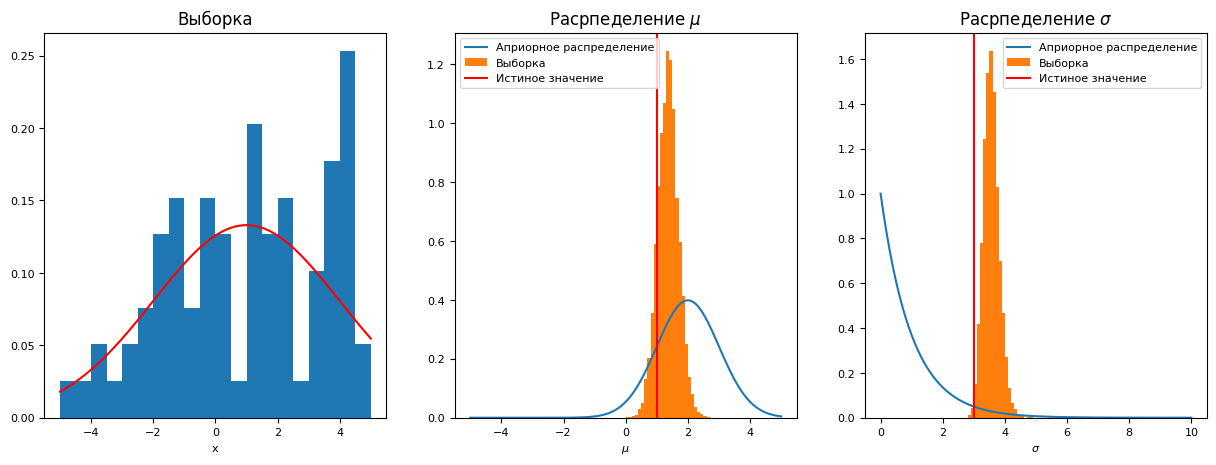

In [15]:
import pymc as pm
from scipy.stats import norm, expon

# Obervations
x = norm(1, 3).rvs(100)

# Model: Normal distribution 
with pm.Model() as pooled:

    # Mean prior
    mu = pm.Normal("mu", 2, sigma=1)
    
    # Sigma prior
    sigma = pm.Exponential("sigma", 1)

    # Likelihood
    obs = pm.Normal("obs", mu, sigma=sigma, observed=x)

    trace_p = pm.sample(2000, return_inferencedata = False)
    
f, ax = plt.subplots(1, 3, figsize = (15, 5))
xs = np.linspace(-5, 5, 100)
mus = np.linspace(-5, 5, 100)
sigmas = np.linspace(0, 10, 100)
ax[0].hist(x, range = [-5,5], bins = 20, density = True)
ax[0].plot(xs, norm(1,3).pdf(xs), color = "red", label = "Истиное распределение")
ax[0].set_xlabel("x")
ax[0].set_title("Выборка")
ax[1].plot(mus, norm(2, 1).pdf(mus), label = "Априорное распределение")
ax[1].hist(trace_p["mu"], range = [-5, 5], bins = 100, label = "Выборка", density = "True")
ax[1].axvline(1, color = "red", label = "Истиное значение")
ax[1].legend()
ax[1].set_xlabel("$\mu$")
ax[1].set_title("Расрпеделение $\mu$")
ax[2].plot(sigmas, expon.pdf(sigmas), label = "Априорное распределение")
ax[2].hist(trace_p["sigma"], range = [0, 10], bins = 100, label = "Выборка", density = "True")
ax[2].axvline(3, color = "red", label = "Истиное значение")
ax[2].legend()
ax[2].set_xlabel("$\sigma$")
ax[2].set_title("Расрпеделение $\sigma$")